In [98]:
%run efx_charity

loaded efx algorithm


## Example

APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
COULD NOT APPLY U0
trying U2 with source: 1
APPLIED U2
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
DONE
player 0 assignments: [ 6. 10.  0.]
player 1 assignments: [ 4. 12.  4.]
player 2 assignments: [0. 8. 6.]


(3,
 3,
 array([[ 6., 10.,  0.],
        [ 4., 12.,  4.],
        [ 0.,  8.,  6.]]),
 array([10., 30., 10.]),
 array([[ 4.2,  2. ,  1. ],
        [ 3. ,  2.5,  0.1],
        [ 1. ,  5. , 29. ]]))

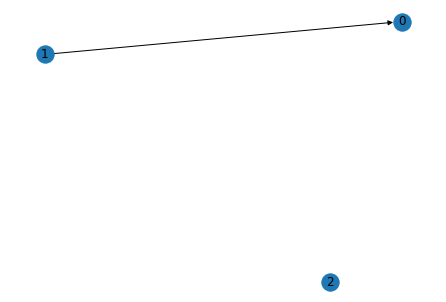

In [99]:
#n, t, assignments, items, valuations
data = (3,3,
 np.zeros((3,3)),
 np.array([10., 30., 10.]),
 np.array([[4.2, 2., 1],
        [3., 2.5, 0.1],
        [1., 5., 29]]))
run_and_check(draw=True, inputs=data, log=True)

## Randomly generate cases

In [101]:
n = 3
t = 2
items = [20, 5]
for i in range(100):
    print(i)
    valuations = np.random.random((n,t))*10
    data = (n,t, np.zeros((n,t)), items, valuations)
    run_and_check(draw=False, inputs=data, log=True)

0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
DONE
player 0 assignments: [7. 2.]
player 1 assignments: [7. 1.]
player 2 assignments: [6. 2.]
1
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
DONE
player 0 assignments: [7. 1.]
player 1 assignments: [7. 2.]
player 2 assignments: [6. 2.]
2
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
COULD NOT APPLY U0
trying U2 with 

AssertionError: ALL ITEMS SHOULD BE ALLOCATED

## Another algorithm

This one does round robin on any source.

In [104]:
def run_rr(inputs=None):
    n, t, assignments, items, valuations = inputs if inputs else setup()
    # algorithm
    while True:
        # assert partial EFX
#         assert check_all_efx(assignments, valuations), "this should be partial EFX"
        # de cycle graph if needed
        G = create_envy_digraph(assignments, valuations, n)
        is_cycle, cycle = locate_envy_cycle(G)
        while is_cycle:
#             print("DE-CYCLING GRAPH")
            cycle_mask = cycle
            cycle_mask_new = cycle_mask[1:] + cycle_mask[0:1]
            assignments[cycle_mask_new] = assignments[cycle_mask]
            G = create_envy_digraph(assignments, valuations, n)
            is_cycle, cycle = locate_envy_cycle(G)
        assert is_directed_acyclic_graph(G)
        # check if done
        if check_all_done(assignments, items):
#             print("DONE")
            return n, t, assignments, items, valuations
        # find a source and assign it its favorite item
        all_sources = [s for s,d in G.in_degree() if d == 0]
        np.random.shuffle(all_sources)
#         print(all_sources)
        added_item = False
        for s in all_sources:
            prefs = np.argsort(valuations[s,:])[::-1]
            for p in prefs:
                if item_type_available(assignments, items, p):
                    # if available but not EFX, dont use this source
                    assignments[s,p] += 1
                    if check_all_efx(assignments, valuations):
#                         print("assigning type", p, "to player", s)
                        added_item = True
                    else:
                        assignments[s,p] -= 1
                    break
            if added_item:
                break
        if added_item:
            continue
        print("COULDNT ADD ITEM(?)")
        return n, t, assignments, items, valuations

In [107]:
n = 4
t = 5
trials = 10000
all_items = np.random.randint(10, 11, (trials, t)) # start with 10 items each to reduce randomness
all_valuations = np.random.random((trials, n,t))*10

for i in range(trials):
    if i % 100 == 0:
        print(i)
    items = all_items[i, :]
    valuations = all_valuations[i, :, :]
    data = (n,t, np.zeros((n,t)), items, valuations)
    
    out = run_rr(inputs=data)
    assert check_all_efx(out[2], out[4]), "EFX SHOULD HOLD"
    while not check_all_done(out[2], out[3]):
        print('i = ', i, 'trying again...')
        data = (n,t, np.zeros((n,t)), items, valuations)
        out = run_rr(inputs=data)  # "ALL ITEMS SHOULD BE ALLOCATED"

0
100
200
COULDNT ADD ITEM(?)
i =  249 trying again...
300
400
500
COULDNT ADD ITEM(?)
i =  597 trying again...
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
COULDNT ADD ITEM(?)
i =  2115 trying again...
2200
2300
2400
2500
2600
2700
COULDNT ADD ITEM(?)
i =  2795 trying again...
2800
2900
COULDNT ADD ITEM(?)
i =  2955 trying again...
COULDNT ADD ITEM(?)
i =  2960 trying again...
3000
3100
3200
COULDNT ADD ITEM(?)
i =  3214 trying again...
3300
3400
3500
3600
COULDNT ADD ITEM(?)
i =  3636 trying again...
3700
COULDNT ADD ITEM(?)
i =  3798 trying again...
3800
COULDNT ADD ITEM(?)
i =  3856 trying again...
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
COULDNT ADD ITEM(?)
i =  5064 trying again...
5100
5200
5300
COULDNT ADD ITEM(?)
i =  5393 trying again...
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
COULDNT ADD ITEM(?)
i =  6529 trying again...
6600
6700
COULDNT ADD ITEM(?)
i =  6782 trying again...
6800
6900
7000
7100
7200
7300


In [374]:
# most of the slowdown is checking EFX
# could 2-3x the speedup by fixing this

# %prun run_rr(inputs=data)